In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [101]:
df_train=pd.read_csv(r'C:\Users\user\Documents\train_ctrUa4K.csv')

In [102]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
df_train.shape

(614, 13)

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [105]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [106]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling missing values on train data

In [107]:
df_train.fillna(method='ffill',inplace=True)

In [108]:
df_train.fillna(method='bfill',inplace=True)

In [109]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

Text(0.5, 1.0, 'Target Distribution')

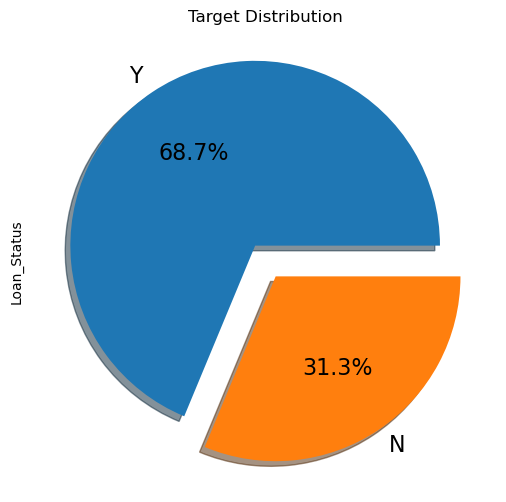

In [110]:
plt.figure(figsize=(6,6))
df_train['Loan_Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,textprops={'fontsize':16}).set_title("Target Distribution")

In [111]:
##Comparison of categorical values and Target variable

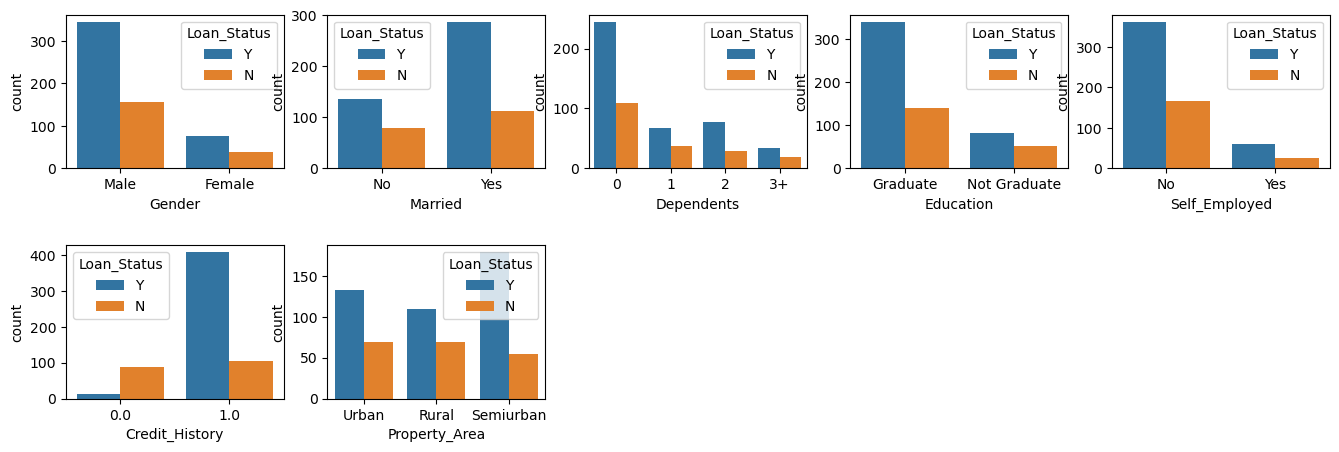

In [112]:
plt.subplots_adjust(left=0.125, bottom=0.1, right=2.1, top=0.9, wspace=0.2, hspace=0.5)
plt.subplot(251)
sns.countplot(x=df_train.Gender,hue=df_train.Loan_Status)
plt.subplot(252)
sns.countplot(x=df_train.Married,hue=df_train.Loan_Status)
plt.subplot(253)
sns.countplot(x=df_train.Dependents.astype('category'),hue=df_train.Loan_Status)
plt.subplot(254)
sns.countplot(x=df_train.Education,hue=df_train.Loan_Status)
plt.subplot(255)
sns.countplot(x=df_train.Self_Employed,hue=df_train.Loan_Status)
plt.subplot(256)
sns.countplot(x=df_train.Credit_History,hue=df_train.Loan_Status)
plt.subplot(257)
sns.countplot(x=df_train.Property_Area,hue=df_train.Loan_Status)
plt.show()

In [113]:
##outliers checking(visualizing numerical values)

<Figure size 2000x1000 with 0 Axes>

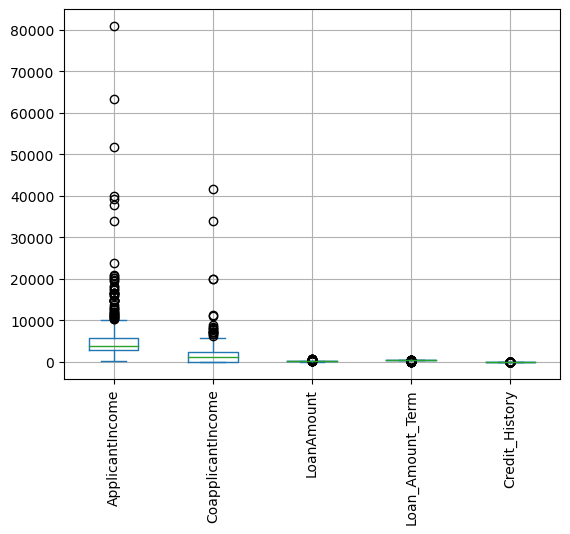

In [114]:
plt.figure(figsize=(20,10))
df_train.plot(kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

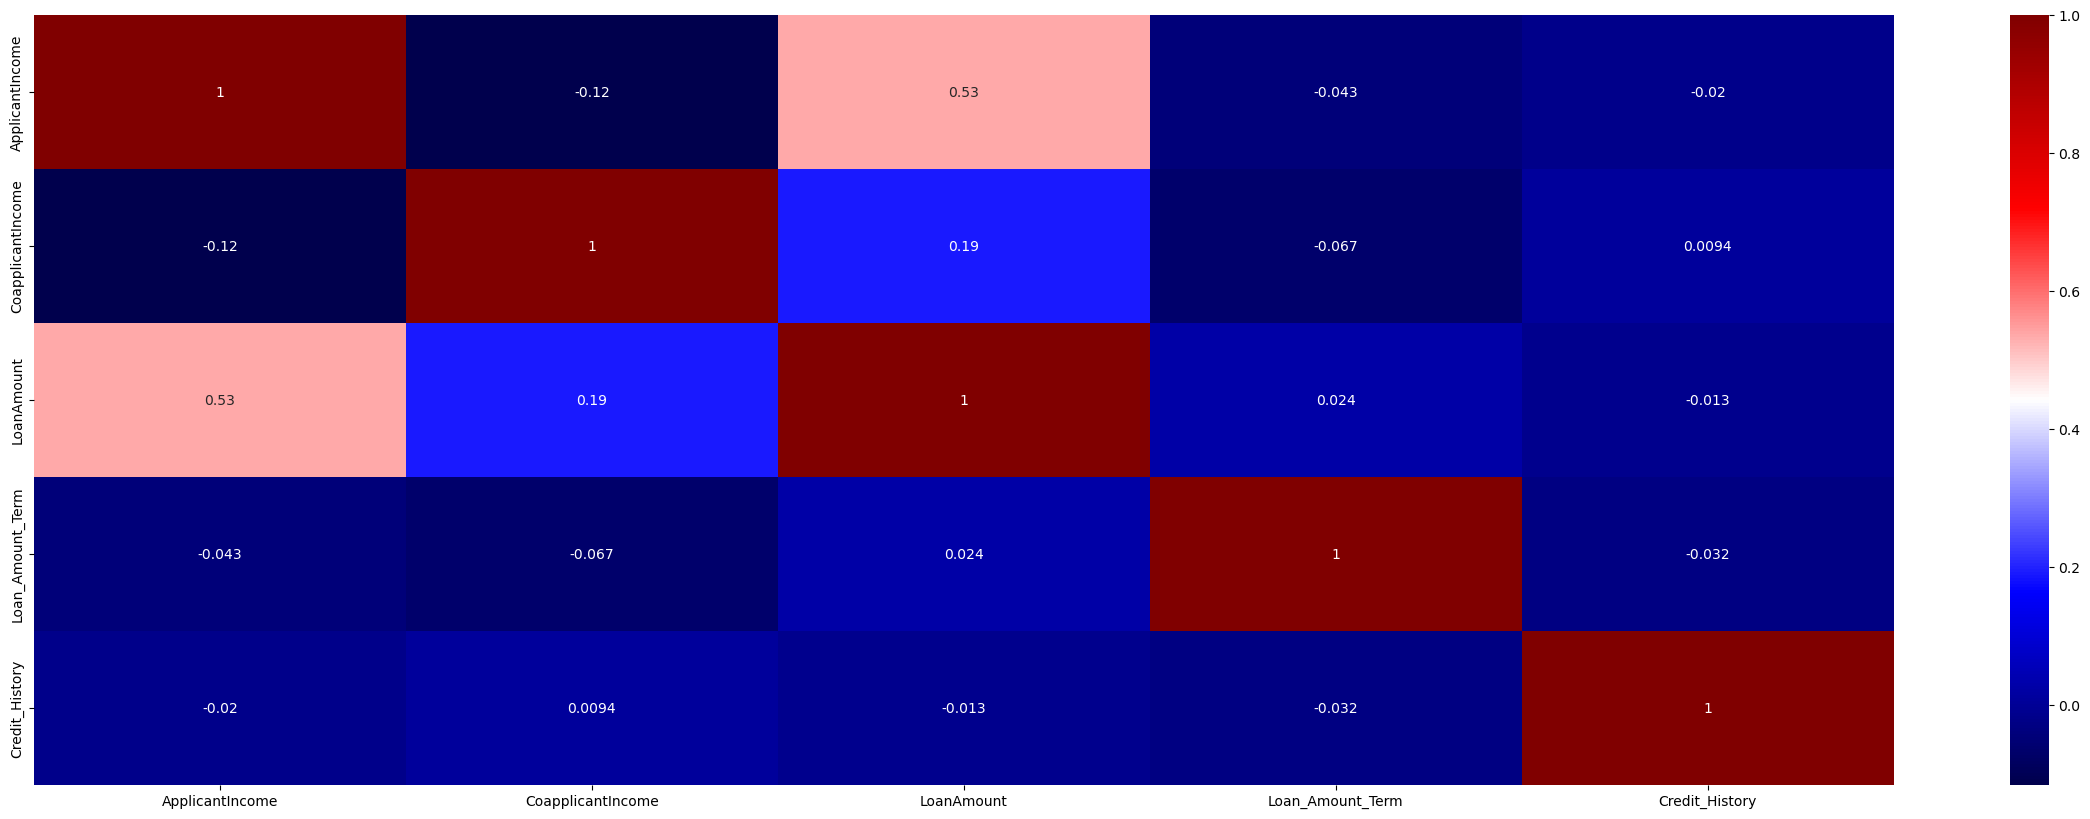

In [115]:
corr_matrix=df_train.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,annot=True,cmap='seismic')
plt.show()

# There seems to be outliers in applicant income and coapplicant income which needs to be taken into consideration

<AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='Loan_Status'>

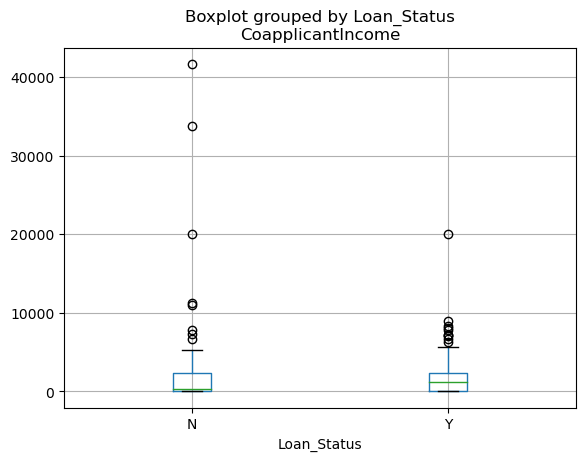

In [116]:
df_train.boxplot(column='CoapplicantIncome',by='Loan_Status')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

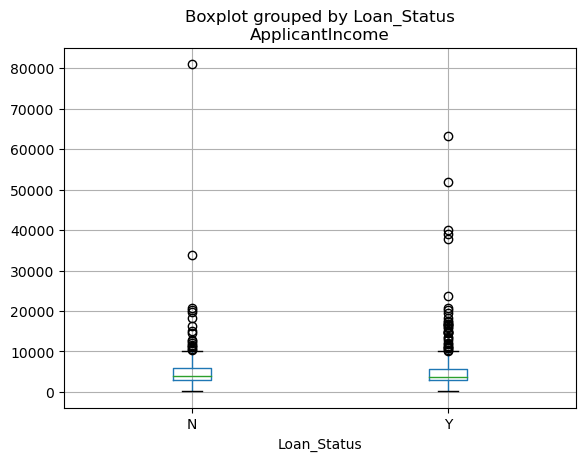

In [117]:
df_train.boxplot(column='ApplicantIncome',by='Loan_Status')

# Data Preprocessing

In [118]:
df_train.Loan_Status.replace('N',0,inplace=True)
df_train.Loan_Status.replace('Y',1,inplace=True)

In [119]:
##reading test data

In [120]:
df_test=pd.read_csv(r'C:\Users\user\Documents\test_lAUu6dG.csv')

In [121]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [122]:
df_test.shape

(367, 12)

In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [124]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [125]:
##filling missing values on test data

In [126]:
df_test.fillna(method='ffill',inplace=True)

In [127]:
df_test.fillna(method='bfill',inplace=True)

In [128]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [129]:
original_train=df_train.copy()
original_test=df_test.copy()

In [130]:
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)

In [131]:
x=df_train.drop('Loan_Status',axis=1)
y=df_train['Loan_Status']

In [132]:
df_train=pd.get_dummies(df_train)

In [133]:
df_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


# ONE HOT ENCODING 

In [134]:
x=pd.get_dummies(x)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [135]:
df_test=pd.get_dummies(df_test)
df_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


# Modelling

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,random_state=42,test_size=0.25)

# Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=300)
log_model=log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_cv)

In [138]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [139]:
confusion_matrix(y_cv,y_pred_log)

array([[24, 30],
       [ 3, 97]], dtype=int64)

In [140]:
Log_reg_acc=accuracy_score(y_cv,y_pred_log)
Log_reg_acc

0.7857142857142857

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59        54
           1       0.76      0.97      0.85       100

    accuracy                           0.79       154
   macro avg       0.83      0.71      0.72       154
weighted avg       0.81      0.79      0.76       154



# Predicting Loan Status

In [142]:
test_pred=log_model.predict(df_test)

In [143]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [144]:
submission=pd.read_csv(r'C:\Users\user\Documents\sample_submission_49d68Cx.csv')

In [145]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [146]:
submission.Loan_Status=test_pred
submission.Loan_ID=original_test.Loan_ID

In [147]:
submission.Loan_Status.replace(0,'N',inplace=True)
submission.Loan_Status.replace(1,'Y',inplace=True)

# Saving predicted values in csv file

In [148]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv(r'C:\Users\user\Documents\Assignment_LoanStatus.csv')

In [149]:
final_pred=pd.read_csv(r'C:\Users\user\Documents\Assignment_LoanStatus.csv')
final_pred.head(10)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
5,5,LP001054,Y
6,6,LP001055,Y
7,7,LP001056,N
8,8,LP001059,Y
9,9,LP001067,Y
